<img src="./source/image.png"  width="1100px" height="400px">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import datetime
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
pd.__version__

'1.0.5'

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [3]:
diamond = pd.read_csv("./source/high_diamond_ranked_10min.csv", sep=",")
diamond

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
pd.plotting.scatter_matrix(diamond, figsize=(90,90));

Output hidden; open in https://colab.research.google.com to view.

In [5]:
diamond = diamond.drop(columns=['redGoldPerMin','redCSPerMin','redExperienceDiff','redGoldDiff', 'redDeaths', 'redKills', 'blueGoldPerMin', 'blueCSPerMin'])

In [ ]:
pd.plotting.scatter_matrix(diamond, figsize=(90,90));

Output hidden; open in https://colab.research.google.com to view.

In [37]:
for i in np.unique(y_test):
    print(i, np.sum(y_test==i))

for i in np.unique(y_train):
    print(i, np.sum(y_train==i))

0.0 994
1.0 982
0.0 3955
1.0 3948


In [39]:
def show_curve(est, X, y):
    means, stds = [], []
    nfolds_range = range(2,50)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

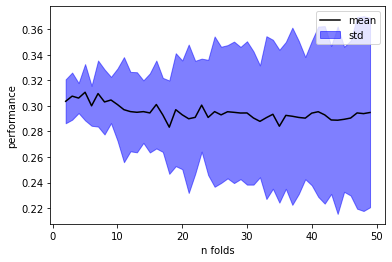

In [40]:
show_curve(est, X_test, y_test)

In [ ]:
cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)

In [ ]:
X_train = PCA(n_components=38).fit_transform(X_train)
print( "shape after PCA ", X_train.shape)

score1 = np.mean(predictions1 == y_test)
score2 = np.mean(predictions2 == y_train)

cm_train = confusion_matrix(y_train, predictions2)
cm_test = confusion_matrix(y_test, predictions1)

print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

print(score1)
print(score2)

shape after PCA  (7903, 30)
matrix de confusión en train
 [[2862 1092]
 [1060 2889]]
matrix de confusión en test
 [[718 277]
 [268 713]]
0.7241902834008097
0.7276983424016197


In [ ]:
X = vals[:,2:]
y = vals[:,1]

#p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [ ]:
n_components = range(2, 32)
means, stds = [], []
for n in n_components:
    print( n,)
    #p = Pipeline((("pca", PCA(n_components=n)), ("classifier", SVC(kernel= 'poly')) ))
    s = cross_val_score(SVC(kernel= 'rbf'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

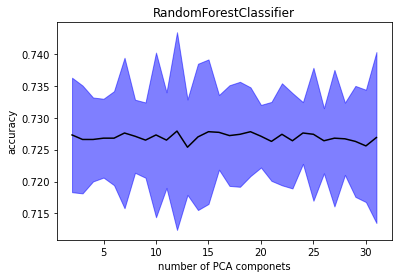

In [ ]:
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [33]:
vals = np.random.permutation(diamond.values)
n = int(len(vals)*.8)
X_train = vals[:n,2:]
X_test = vals[n:,2:]
y_train = vals[:n,1]
y_test = vals[n:,1]

X = vals[:,2:]
y = vals[:,1]

depth = range(2, 32)
means, stds = [], []

for i in depth:
    est = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

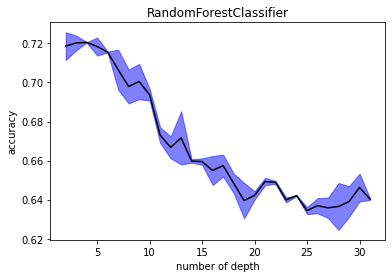

In [34]:
plt.plot(depth, means, color="black")
plt.fill_between(depth, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of depth")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [35]:
min_samples_split = range(2, 32)
means, stds = [], []

for i in min_samples_split:
    est = DecisionTreeClassifier(max_depth=4, min_samples_split=i, criterion='entropy')
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

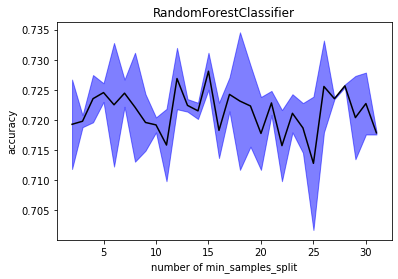

In [36]:
plt.plot(min_samples_split, means, color="black")
plt.fill_between(min_samples_split, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of min_samples_split")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [ ]:
min_samples_leaf = range(2, 32)
means, stds = [], []

for i in min_samples_split:
    est = DecisionTreeClassifier(max_depth=4, min_samples_split=29, criterion='entropy', min_samples_leaf = i)
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

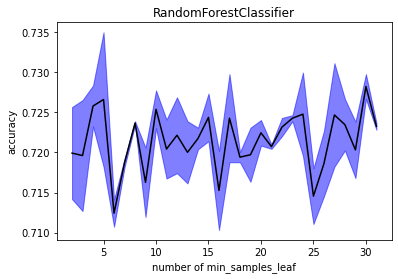

In [ ]:
plt.plot(min_samples_leaf, means, color="black")
plt.fill_between(min_samples_leaf, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of min_samples_leaf")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [31]:
vals = np.random.permutation(diamond.values)

print(vals.min())

vals = vals + 10830.0

X = vals[:,2:]
y = vals[:,1]

n = int(len(vals)*.8)
X_train = vals[:n,2:]
X_test = vals[n:,2:]
y_train = vals[:n,1]
y_test = vals[n:,1]

print(X_train)

est = MultinomialNB(alpha = 1)
est.fit(X_train,y_train)

depth = range(1, 100)
means, stds = [], []

for i in depth:
    s = cross_val_score(MultinomialNB(alpha = i), X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

predictions1 = est.predict(X_test)
predictions2 = est.predict(X_train)
    
score1 = np.mean(predictions2 == y_train)
score2 = np.mean(predictions1 == y_test)
print(score1)
print(score2)

-10830.0
[[10849. 10831. 10830. ... 29229. 11027. 10885.]
 [10845. 10830. 10831. ... 31695. 11036. 10885.]
 [10841. 10832. 10831. ... 29597. 11053. 10878.]
 ...
 [10843. 10835. 10830. ... 28801. 11046. 10866.]
 [10845. 10835. 10830. ... 28416. 11020. 10866.]
 [10847. 10837. 10830. ... 28090. 11035. 10866.]]
0.7222573706187524
0.7449392712550608


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

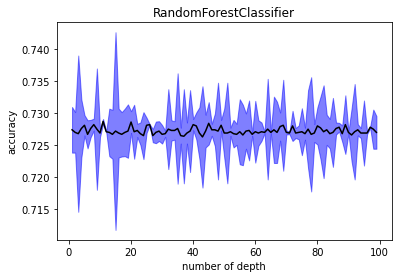

In [32]:
plt.plot(depth, means, color="black")
plt.fill_between(depth, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of depth")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt